# PHYS 481 Assignment 8
### Joon Mo Park
### Jessica Martens

## Question 1


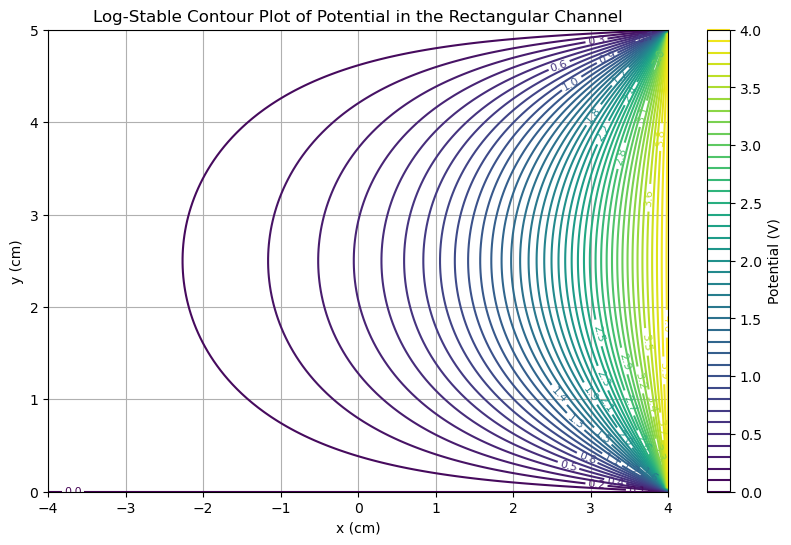

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
V0 = 4.0  # Voltage in Volts
a = 5.0   # cm (distance between plates)
b = 4.0   # cm (length of the channel in x direction)
num_terms = 1001  # Number of terms in the series
x_vals = np.linspace(-b, b, 200)
y_vals = np.linspace(0, a, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Logarithmic approach to avoid overflow entirely
def log_stable_potential(x, y, num_terms=1001):
    V = np.zeros_like(x)
    for n in range(1, num_terms, 2):  # Summing only odd terms
        n_pi_a = n * np.pi / a
        log_sinh_term_ratio = n_pi_a * (x - b) - np.log1p(-np.exp(-2 * n_pi_a * b))
        sinh_term_ratio = np.exp(log_sinh_term_ratio)
        V += (1 / n) * sinh_term_ratio * np.sin(n_pi_a * y)
    return (4 * V0 / np.pi) * V

# Recompute the potential with the logarithmic approach
V_log_stable = log_stable_potential(X, Y, num_terms=num_terms)

# Plot the contour plot again with the log-stable computation
plt.figure(figsize=(10, 6))
contour = plt.contour(X, Y, V_log_stable, levels=np.arange(0, V0 + 0.1, 0.1), cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.colorbar(label='Potential (V)')
plt.title("Log-Stable Contour Plot of Potential in the Rectangular Channel")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.grid(True)
plt.show()

## Question 2

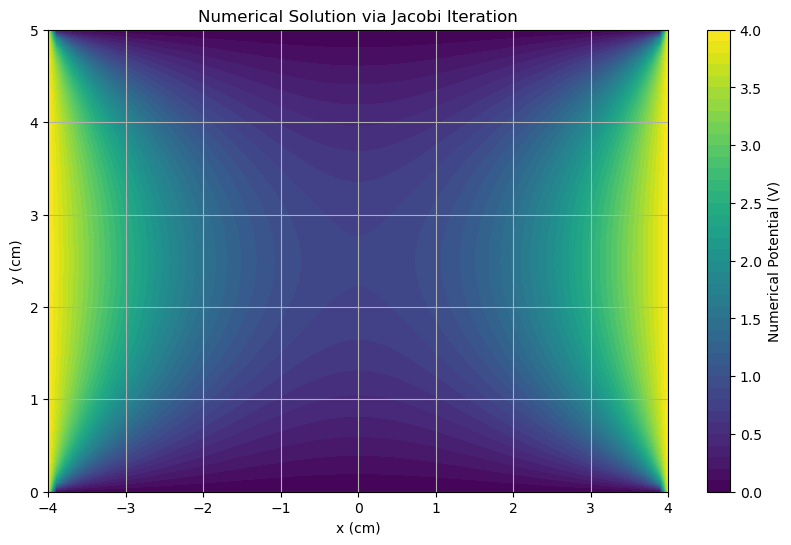

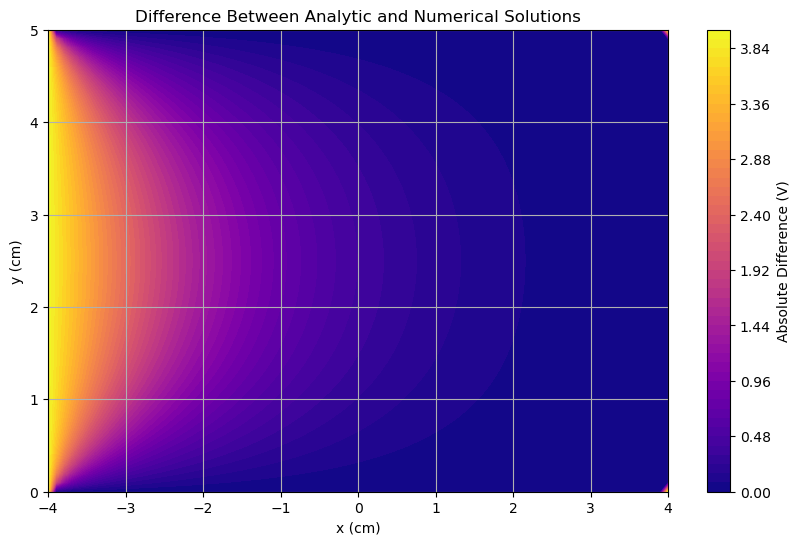

In [3]:
# Jacobi Iteration Implementation
def jacobi_iteration(a, b, V0, tol=1e-5, max_iter=10000, dx=0.1, dy=0.1):
    nx, ny = int(2 * b / dx) + 1, int(a / dy) + 1
    V = np.zeros((ny, nx))  # Initialize potential array
    x = np.linspace(-b, b, nx)
    y = np.linspace(0, a, ny)
    
    # Boundary conditions
    V[0, :] = 0  # Bottom plate (y = 0)
    V[-1, :] = 0  # Top plate (y = a)
    V[:, 0] = V0  # Left strip (x = -b)
    V[:, -1] = V0  # Right strip (x = b)
    
    # Iterate
    V_new = V.copy()
    for _ in range(max_iter):
        for i in range(1, ny - 1):
            for j in range(1, nx - 1):
                V_new[i, j] = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])
        
        # Check convergence
        if np.max(np.abs(V_new - V)) < tol:
            break
        V[:] = V_new[:]
    
    return x, y, V_new

# Perform Jacobi iteration
dx, dy = 0.1, 0.1
x_jacobi, y_jacobi, V_numerical = jacobi_iteration(a, b, V0, dx=dx, dy=dy)

# Compute the analytic solution on the same grid for comparison
X_analytic, Y_analytic = np.meshgrid(x_jacobi, y_jacobi)
V_analytic = log_stable_potential(X_analytic, Y_analytic, num_terms=num_terms)

# Compute the absolute difference
V_difference = np.abs(V_analytic - V_numerical)

# Plot numerical solution
plt.figure(figsize=(10, 6))
plt.contourf(X_analytic, Y_analytic, V_numerical, levels=np.arange(0, V0 + 0.1, 0.1), cmap='viridis')
plt.colorbar(label='Numerical Potential (V)')
plt.title("Numerical Solution via Jacobi Iteration")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.grid(True)
plt.show()

# Plot absolute difference
plt.figure(figsize=(10, 6))
plt.contourf(X_analytic, Y_analytic, V_difference, levels=50, cmap='plasma')
plt.colorbar(label='Absolute Difference (V)')
plt.title("Difference Between Analytic and Numerical Solutions")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.grid(True)
plt.show()

## Question 3

## Question 4